# 100 numpy exercises

This is a collection of exercises that have been collected in the numpy mailing list, on stack overflow
and in the numpy documentation. The goal of this collection is to offer a quick reference for both old
and new users but also to provide a set of exercises for those who teach.


If you find an error or think you've a better way to solve some of them, feel
free to open an issue at <https://github.com/rougier/numpy-100>.

File automatically generated. See the documentation to update questions/answers/hints programmatically.

Run the `initialize.py` module, then call a random question with `pick()` an hint towards its solution with
`hint(n)` and the answer with `answer(n)`, where n is the number of the picked question.

In [2]:
%run initialise.py

In [14]:
import numpy as np

In [52]:
pick()

46. Create a structured array with `x` and `y` coordinates covering the [0,1]x[0,1] area (★★☆)


#### 38. Consider a generator function that generates 10 integers and use it to build an array (★☆☆)

In [12]:
# p 38
def generate() :
    arr = []
    for i in range(10) :
        arr.append(np.random.randint(1500))
    return arr

x = generate()
print(x)

[43, 1306, 1207, 430, 1012, 208, 1105, 732, 223, 597]


In [26]:
def generate_answer() :
    for x in range(10):
        yield x 

print(np.fromiter(generate_answer(), float, count=10))


[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


##### answer

In [18]:
answer(38)

def generate():
    for x in range(10):
        yield x
Z = np.fromiter(generate(),dtype=float,count=-1)
print(Z)


In [19]:
def generate():
    for x in range(10):
        yield x # can't return.. => because iteration!
Z = np.fromiter(generate(),dtype=float,count=-1)
print(Z)
# Fromiter function => parameter: iteration, type => So, iteration can be function!
# Count => How much iteration? => can made multiplication table by (i<j)! or.. binomial coefficient ?

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


##### Which code is the fastest?

In [30]:
%timeit -n 10000 np.fromiter(generate(), dtype = int, count = -1)
%timeit -n 10000 generate_answer
%timeit -n 10000 np.fromiter((i for i in range(10)), dtype  = int, count = -1)

# Fromiter is much faster than generate_answer!

1.58 µs ± 229 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
21 ns ± 0.414 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.5 µs ± 51.5 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


#### 21. Create a checkerboard 8x8 matrix using the tile function (★☆☆)

In [44]:
x = np.tile([[0, 1],[1, 0]], (4, 4))
print(x)
type(np.array([[0,1],[1,0]]))

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


numpy.ndarray

In [50]:
answer(21)

Z = np.tile( np.array([[0,1],[1,0]]), (4,4))
print(Z)


In [42]:
Z = np.tile( np.array([[0,1],[1,0]]), (4,4))
print(Z)
type(Z)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


numpy.ndarray

##### Is it faster to construct using ndarray than list ?

In [53]:
%timeit -n 10000 np.tile( np.array([[0,1],[1,0]]), (4,4))
%timeit -n 10000 np.tile([[0, 1],[1, 0]], (4, 4))
# similar!
# Below is little faster because of transformation.. but.. hmm
# I think ndarray is more stable than list.

5.15 µs ± 1.03 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
4.68 µs ± 39.7 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


#### 46. Create a structured array with `x` and `y` coordinates covering the [0,1]x[0,1] area (★★☆)

In [92]:
Z = np.zeros((101,101), [('x',float),('y',float)])
Z['x'], Z['y'] = np.meshgrid(np.linspace(0,1,101), np.linspace(0,1,101))
print(Z)

[[(0.  , 0.  ) (0.01, 0.  ) (0.02, 0.  ) ... (0.98, 0.  ) (0.99, 0.  )
  (1.  , 0.  )]
 [(0.  , 0.01) (0.01, 0.01) (0.02, 0.01) ... (0.98, 0.01) (0.99, 0.01)
  (1.  , 0.01)]
 [(0.  , 0.02) (0.01, 0.02) (0.02, 0.02) ... (0.98, 0.02) (0.99, 0.02)
  (1.  , 0.02)]
 ...
 [(0.  , 0.98) (0.01, 0.98) (0.02, 0.98) ... (0.98, 0.98) (0.99, 0.98)
  (1.  , 0.98)]
 [(0.  , 0.99) (0.01, 0.99) (0.02, 0.99) ... (0.98, 0.99) (0.99, 0.99)
  (1.  , 0.99)]
 [(0.  , 1.  ) (0.01, 1.  ) (0.02, 1.  ) ... (0.98, 1.  ) (0.99, 1.  )
  (1.  , 1.  )]]


In [76]:
x = np.array([0, 1])
y = np.array([0, 1])
X, Y = np.meshgrid(x, y)
print(X, Y)

# np.meshgrid(x, y): 격자화 시켜주는 요소
# 지금 상황에서 scatter을 하면.. (0, 0), (1, 1)만 찍히지만 meshgrid를 하면 전체 다 찍힘
# meshgrid is very useful to evaluate functions on a grid. If the function depends on all coordinates, you can use the parameter sparse=True to save memory and computation time.
# 즉, 함수의 값에 대해 x와 y에 관한 함수를 동시에 계산해야할 때 굉장히 편해짐! like Equation of circle

[[0 1]
 [0 1]] [[0 0]
 [1 1]]


In [74]:
xx = np.linspace(-5, 5, 101) # -5~5까지 101개의 벡터를 생성
yy = np.linspace(-5, 5, 101)
xs, ys = np.meshgrid(xx, yy)
zs = np.sqrt(xs**2 + ys**2)
xs.shape, ys.shape

((101, 101), (101, 101))

In [73]:
xxs, yys = np.meshgrid(xx, yy, sparse = True)
xxs.shape, yys.shape

((1, 101), (101, 1))

##### Let us Visualize!

(-1.0, 5.0)

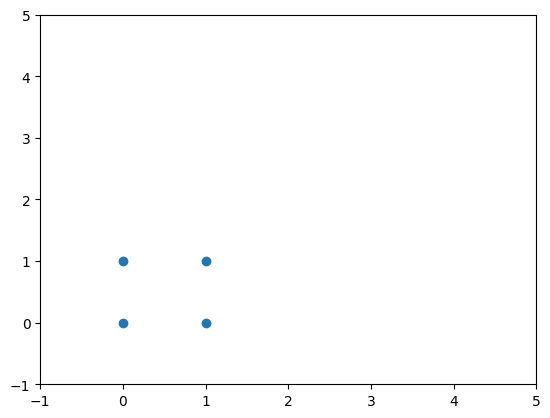

In [78]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.xlim(-1, 5)
plt.ylim(-1, 5)

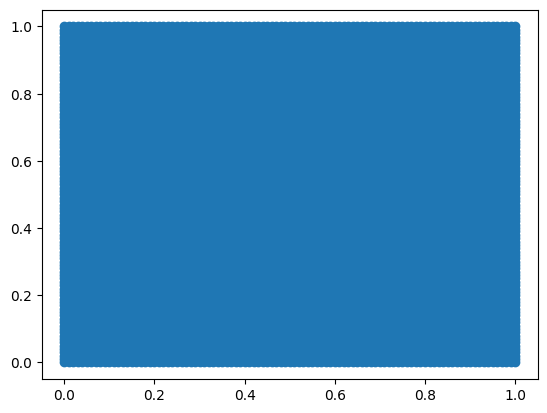

In [93]:
plt.scatter(Z['x'], Z['y'])

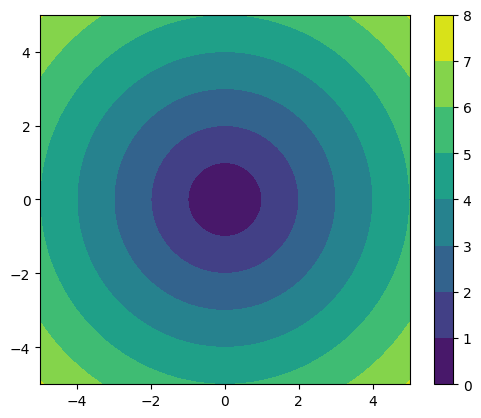

In [68]:
h = plt.contourf(xx, yy, zs)
plt.axis('scaled')
plt.colorbar()
plt.show()